<a href="https://colab.research.google.com/github/kingattai/vehicular-channel-estimation-dl/blob/main/TempleRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NFRF ML/TempleBal.csv')
df

,Unnamed: 0,Velocity,Doppler shift,Distance,Average path Gain,Path Delays,CSI
0,0,51.199413,71.952692,3.487668,-7.535545,96.971634,1
1,1,114.578574,169.399720,0.801152,-16.514708,96.737418,0
2,2,90.519334,65.577744,2.216071,-14.628749,32.805970,1
3,3,75.852433,140.388965,6.316539,-12.558405,77.845406,0
4,4,27.162050,9.021801,0.379942,-18.882011,12.805361,1
...,...,...,...,...,...,...,...
18695,18695,53.759715,101.404219,8.148921,-2.435431,12.154524,0
18696,18696,104.810094,81.697661,3.722712,-7.924469,87.475364,1
18697,18697,46.393699,186.180256,1.624699,-8.871713,61.045876,0
18698,18698,38.530240,17.907019,1.705192,-9.906307,93.574051,1


In [ ]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)

In [ ]:
X = df2.iloc[:, :5].values
Y = df2.iloc[:, 5:].values

In [ ]:
X

array([[ 51.19941307,  71.95269234,   3.48766829,  -7.53554475,
         96.97163398],
       [114.57857371, 169.39971995,   0.80115164, -16.51470811,
         96.73741832],
       [ 90.5193336 ,  65.57774373,   2.21607064, -14.62874924,
         32.80597003],
       ...,
       [ 46.39369854, 186.18025592,   1.62469909,  -8.87171341,
         61.04587612],
       [ 38.53024033,  17.90701942,   1.70519218,  -9.90630671,
         93.57405067],
       [ 91.7647043 , 123.11404016,   9.8376152 , -15.69379843,
         88.79964172]])

In [ ]:
Y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
# Data normalization using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.374561  , 0.35979555, 0.34218724, 0.62325717, 0.96941507],
       [0.95078521, 0.84708163, 0.07080982, 0.17426814, 0.967049  ],
       [0.73204585, 0.32791747, 0.2137373 , 0.26857257, 0.32120648],
       ...,
       [0.33086889, 0.93099309, 0.15400014, 0.55644415, 0.60648912],
       [0.2593767 , 0.08953892, 0.16213112, 0.50471092, 0.93509231],
       [0.74336839, 0.61562903, 0.98362462, 0.21531645, 0.88686071]])

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [ ]:
# Random Forest (RF) Classifier
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_metrics = evaluate_model(y_test, y_pred_rf)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
print("Random Forest Performance Metrics: Accuracy={}, Precision={}, Recall={}, F1-Score={}, ROC-AUC={}".format(*rf_metrics))

Random Forest Performance Metrics: Accuracy=0.9994652406417113, Precision=0.9989445910290238, Recall=1.0, F1-Score=0.9994720168954594, ROC-AUC=0.9994585814834867


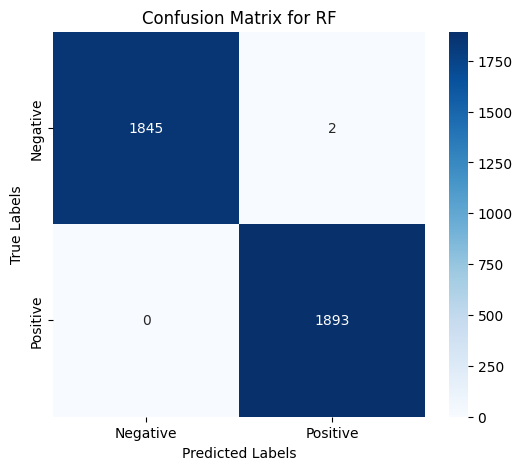

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "RF")